# Naive Bayes and SVM Text Classification

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=32)

In [5]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [7]:
model = BernoulliNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        15
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45



/opt/anaconda3/envs/inclassEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X before transform: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


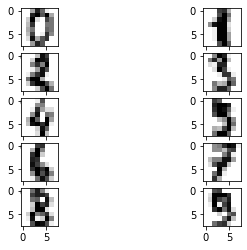

X after transform: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Uniques and counts:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
Cross Validation  0.9809015873015874
Overall Accuracy  0.975925925925926


,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,51,0,0,0,0,0,0,1,0
2,0,0,53,0,0,0,0,0,0,0
3,0,0,0,53,0,0,0,0,1,0
4,0,0,0,0,48,0,0,0,0,0
5,0,0,0,0,0,56,0,0,0,1
6,0,1,0,0,0,0,59,0,0,0
7,0,0,0,0,2,0,0,51,0,0
8,0,2,1,1,0,0,0,0,56,1
9,0,0,0,1,0,1,0,0,0,55


In [10]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

digits = load_digits()

x, y = digits.data, digits.target

print("X before transform: \n",x[0])

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(digits.images[i], cmap='binary', interpolation='none')

plt.show()

print("X after transform: \n",x[0].reshape(8,8))

uniques = np.unique(y, return_counts=True)

print("Uniques and counts: ",uniques)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)



scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

#print(x_train)

x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

svc = SVC(class_weight='balanced', kernel='linear', C=1)

cv = cross_val_score(svc, x_train, y_train, cv=10)

model = svc.fit(x_train, y_train)

score = svc.score(x_test, y_test)

print ("Cross Validation ",np.mean(cv))
print ("Overall Accuracy ",score)


y_pred = svc.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

In [15]:
scaling = MinMaxScaler(feature_range=(0,1)).fit(x_train)

#print(x_train)

x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

gnb = MultinomialNB()

cv = cross_val_score(gnb, x_train, y_train, cv=10)

model = gnb.fit(x_train, y_train)

score = gnb.score(x_test, y_test)

print ("Cross Validation ",np.mean(cv))
print ("Overall Accuracy ",score)


y_pred = gnb.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

Cross Validation  0.8973650793650794
Overall Accuracy  0.9018518518518519


,0,1,2,3,4,5,6,7,8,9
0,44,0,0,0,1,0,0,0,0,0
1,0,43,1,0,0,0,1,0,2,5
2,1,3,45,1,0,0,0,1,1,1
3,0,0,1,43,0,0,0,2,2,6
4,0,0,0,0,46,0,0,2,0,0
5,0,0,0,0,0,46,1,0,0,10
6,0,0,0,0,0,0,60,0,0,0
7,0,0,0,0,1,0,0,52,0,0
8,0,4,0,0,0,0,0,1,55,1
9,0,0,0,0,0,0,0,3,1,53


In [16]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidscott/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidscott/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups


from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    return([token.lower() for token in text if token not in stop_words])

def stem_words(text):
    stemmer = WordNetLemmatizer()
    return ([stemmer.lemmatize(token) for token in text])

def stem_words_more(text):
    stemmer = PorterStemmer()
    return ([stemmer.stem(token) for token in text])

def remove_puncts(text):
    puncts = "~`!@#€$%^&*()_-+={[}]|\:;'<,>.?/"
    return ([char for char in text if char not in puncts])

def clean_data(input_list):
    return_list = []
    for li in input_list:
        return_list.append(stem_words(remove_puncts(remove_stop_words(tokenize(li)))))
    return return_list

def dummy(doc):
    return doc

In [24]:
news = fetch_20newsgroups(subset='all')

X,y = news.data, news.target

print(X[0])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32, stratify=y)

x_train = clean_data(x_train[0:2000])
x_test = clean_data(x_test[0:200])

y_train = y_train[0:2000]
y_test= y_test[0:200]

print(x_test[0])


From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


['from', 'penev', 'rockefeller.edu', 'penio', 'penev', 'subject', 're', 'question', 'installing',

In [25]:
tfidf = TfidfVectorizer(analyzer='word', tokenizer=dummy, preprocessor=dummy, token_pattern=None)

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)


nb_clf =  MultinomialNB(alpha=0.005)

nb_clf.fit(x_train, y_train)

print(nb_clf.score(x_test, y_test))

y_pred = nb_clf.predict(x_test)

print(classification_report(y_test, y_pred))


print(nb_clf.predict(x_test[0]))

0.795
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.60      0.75      0.67         4
           2       0.67      0.50      0.57         8
           3       0.54      0.54      0.54        13
           4       0.75      0.69      0.72        13
           5       0.82      0.75      0.78        12
           6       0.67      0.62      0.64        13
           7       0.64      1.00      0.78         7
           8       1.00      0.80      0.89        10
           9       0.78      1.00      0.88         7
          10       0.94      0.94      0.94        16
          11       0.90      1.00      0.95        18
          12       0.78      0.78      0.78         9
          13       1.00      0.82      0.90        11
          14       0.92      0.86      0.89        14
          15       0.73      0.89      0.80         9
          16       0.80      1.00      0.89         8
          17       1.